In [82]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

import math

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Intro

Linear algebra is fundamental in many fields, particularly in classical computer vision. This is because every image can be represented as a matrix, and matrices represent linear transformations. As a result, we can apply known linear transformations to images!

This lab provides an overview of linear transformations, their proofs, and how to apply them to images to visualize their effects.





## Rules
1. Submit this task as a Jupyter Notebook (.ipynb file).

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.  

4. Provide a **work breakdown** structure estimating the efforts of each team member. Please provide it at the top of your notebook.  

5. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

6. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **resizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!

7. The final deadline is **February 24 2025, 22:00**. If you submit your assignment after this time and date, it will not be graded.




## OpenCV library

In this laboratory work, we will use `OpenCV` to process images. This is a popular library used for working with images and videos. It provides many tools for tasks like image processing, object detection, and analyzing video.

The main thing that you need to know is **Coordinate System**. In `OpenCV`, the coordinate system starts at the top-left corner of the image:

- X-axis increases from left to right.
- Y-axis increases from top to bottom.

So, the point $(0,0)$ is at the top-left of the image, and the point at the bottom-right is $(W-1, H-1)$, where $H$ - height, $W$ - width.

<br>

Some basic information about its methods with examples you can find here: https://www.geeksforgeeks.org/opencv-python-tutorial/#2-working-with-images

## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### What is a transformation matrix?

A transformation matrix is a mathematical matrix used to perform transformations such as translation, scaling, rotation, or reflection on a geometric object, typically a vector or a set of coordinates.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

The shape of the image is (500, 500, 3)


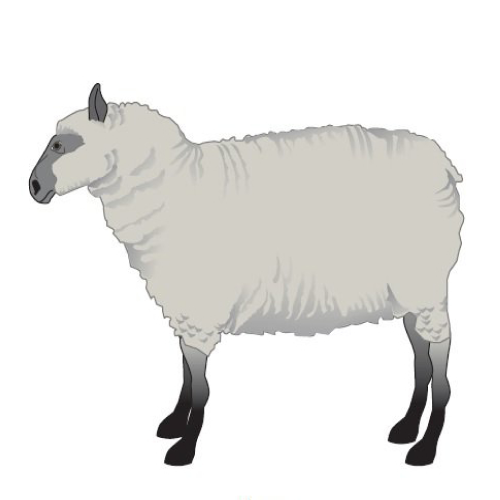

In [83]:
# Load images

##### YOUR CODE STARTS #####

img1_path = '/content/drive/My Drive/Lab1 Linear algebra/sheep.png'
image = cv.imread(img1_path)


resized = cv.resize(image, (500,500))

print(f"The shape of the image is {image.shape}")
cv2_imshow(resized)

##### YOUR CODE ENDS #####

 What is this image's shape? What do the values mean?

The original image's shape is 500x500. Since the 3rd number is 3, there are 3 color channels (RGB).

1. Height – number of rows (in pixels).
2. Width – number of columns (in pixels).
3. Channels – number of color channels (3 for RGB, absent for grayscale).





### 1.2 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
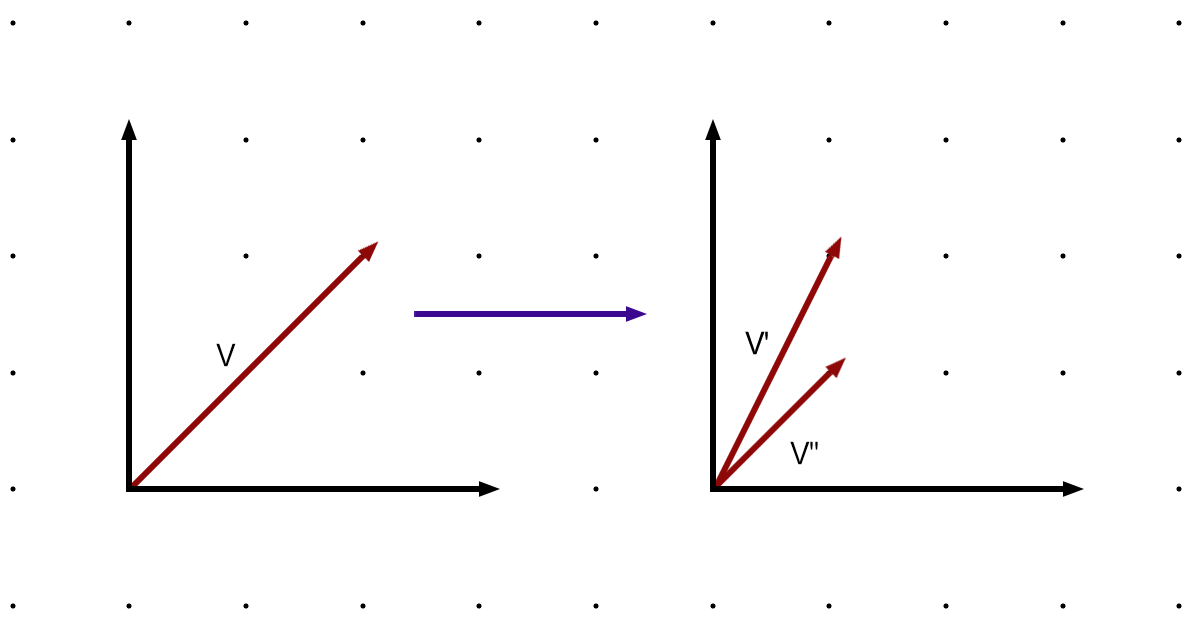

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector. First, explain how you derive the scaling matrix:

A *scaling matrix* is a diagonal matrix that stretches or shrinks vectors along specific axes.
$$
\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix} * \begin{bmatrix} x \\ y \end{bmatrix}
$$
where
$x' = s_x*x$ and $y'=s_y*y$:

$$
\begin{bmatrix} x' \\ y' \end{bmatrix} =
\begin{bmatrix} 1 & 0 \\ 0 & 0.5 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 1 \cdot x + 0 \cdot y \\ 0 \cdot x + 0.5 \cdot y \end{bmatrix} =
\begin{bmatrix} x \\ 0.5y \end{bmatrix}
$$


In [84]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.array([[scale_factor_x, 0], [0, scale_factor_y]])

M2 = get_scaling_matrix(1, 0.5)

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

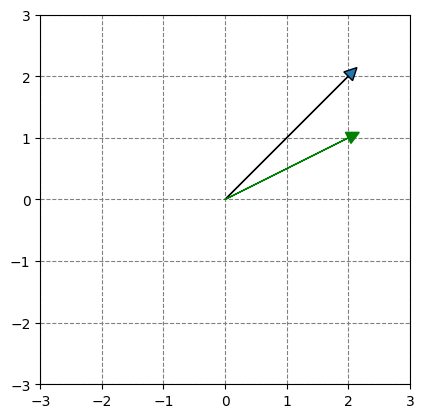

In [85]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([2, 2])
B2 = M2 @ B1
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now, apply scaling by some factor to the image (scaled by a factor of (1, 0.5) before) to restore the **sheep.png**:

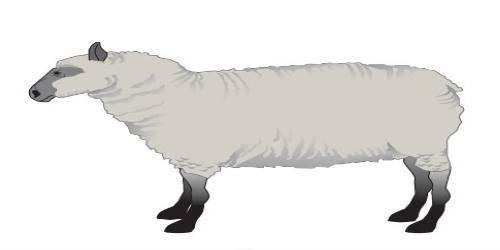

In [86]:
scaled_img = cv.imread("/content/drive/My Drive/Lab1 Linear algebra/scaled_sheep.png")
cv2_imshow(scaled_img)

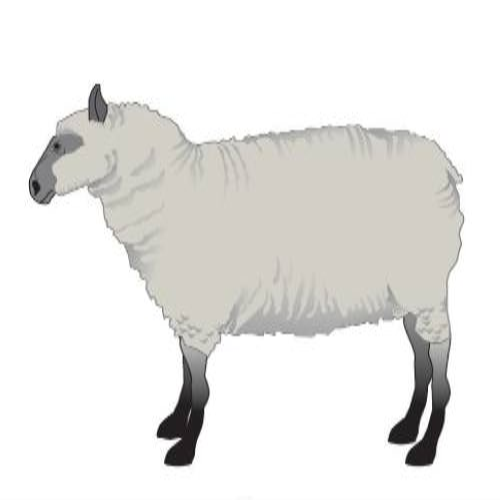

In [87]:
##### YOUR CODE STARTS #####
height, width, _ = scaled_img.shape
restored_img = cv.resize(scaled_img, (width, int(height*2)))
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.3 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you need to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector. First, explain how do you build a matrix that corresponds to a shearing transformation:

To apply this matrix to a point (x,y), we multiply the point's coordinate vector by the matrix:

$x'=x+k*y$ and $y' = y$
$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
1 & k \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$



Second, implement a function for constructing such a matrix:

In [88]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor):
  return np.float64([[1, factor], [0, 1]])

M3 = get_horizontal_shear_matrix(1.5)
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[1.  1.5]
 [0.  1. ]]


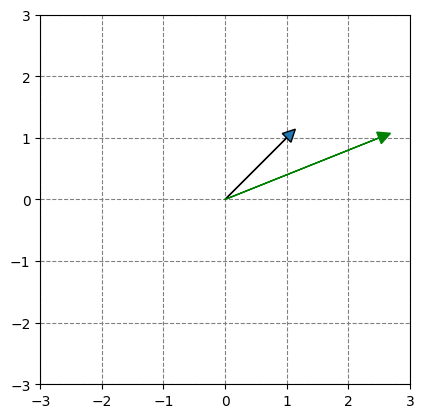

In [89]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = M3 @ B1
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image (transformed with vertical shearing) to restore **sheep.png**.

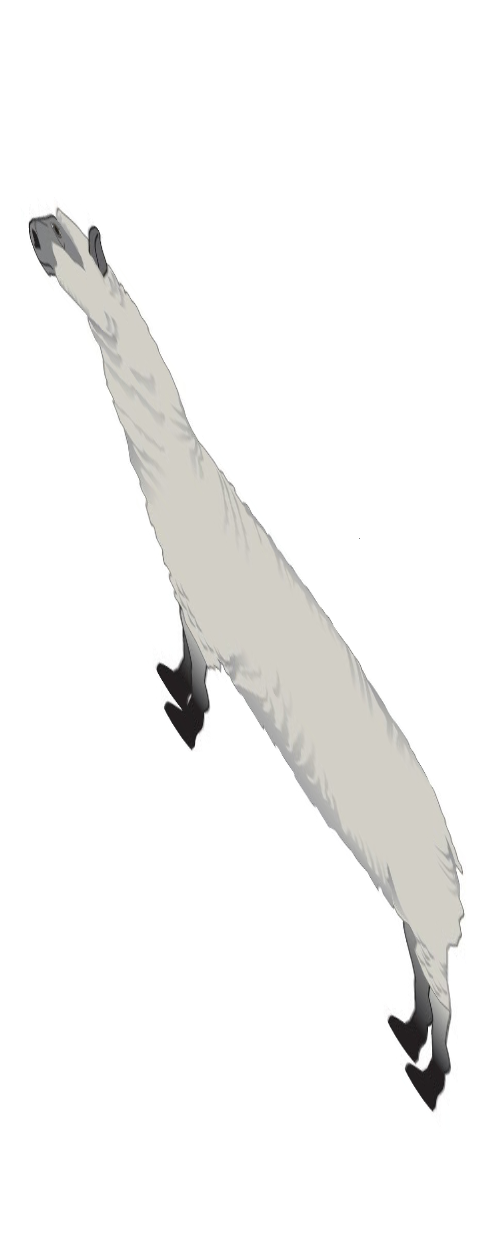

In [90]:
sheared_img = cv.imread("/content/drive/My Drive/Lab1 Linear algebra/sheared_sheep.png")
cv2_imshow(sheared_img)

250 500


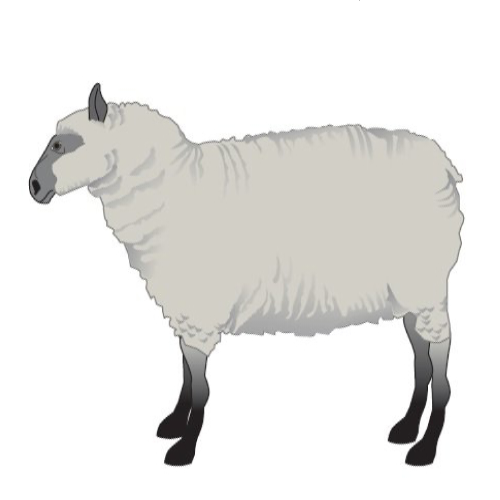

In [91]:
##### YOUR CODE STARTS #####
rows, cols = sheared_img.shape[:2]
print(height, width)
# new_size=M3@sheared_size
# print((int(sheared_size[0]), int(sheared_size[1]-0.25* sheared_size[0])))
restored_img = cv.warpPerspective(sheared_img, np.float64([[1, 0, 0], [-1.5, 1, 0], [0, 0, 1]]), (500, 500))

##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.4 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


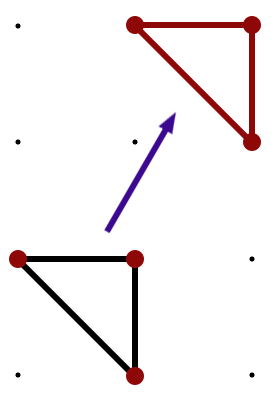

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector. Start from explaining how to construct a translation matrix:

Normally, in a 2D space, translating a point $(x,y)$ by $(t_x,t_y)$ simply means adding the translation values to each coordinate:

$$(x', y') = (x+t_x, y+t_y)$$

But if we want to define a translation matrix, we have to first extend the 2D vector to 3D coordinates as follows:

$$(x, y)^T = (x, y, 1)^T$$

Now, we can define a translation matrix that is constructed as follows:

$$
T = \begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
$$

Where $t_x$ and $t_y$ represent the translation factors along the x and y axes, respectively. This works due to the nature of matrix multiplication; by left-multiplying the matrix by the extended-coordinates vector, we get

$$\begin{bmatrix}x \\ y \\ 1\end{bmatrix}\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix} = \begin{bmatrix}x + t_x \\ y + t_y \\ 1\end{bmatrix}$$

Which can then be reduced back to 2D coordinates.

Then, implement a function that produces such a matrix:

In [92]:
##### YOUR CODE STARTS #####
def extend_coordinates(v):
  return np.concatenate((np.array(v), [1]))

def decrease_coordinates(v):
  return v[:2]

def get_translation_matrix(translation_factor_x, translation_factor_y):
  return  np.float64([
        [1, 0, translation_factor_x],
        [0, 1, translation_factor_y],
        [0, 0, 1]])

M4 = get_translation_matrix(20,25)
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

Translation matrix is
[[ 1.  0. 20.]
 [ 0.  1. 25.]
 [ 0.  0.  1.]]


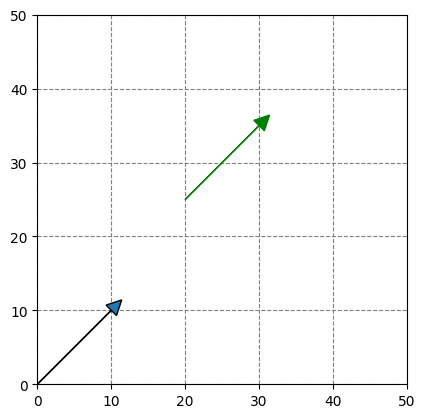

In [93]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0])
B1 = np.array([10, 10])
tx, ty = 20, 25

# Apply translation
A2 = decrease_coordinates(M4 @ extend_coordinates(A1))
B2 = decrease_coordinates(M4 @ extend_coordinates(B1))
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation to the image (translated by (20, 25) before) to restore **sheep.png**.






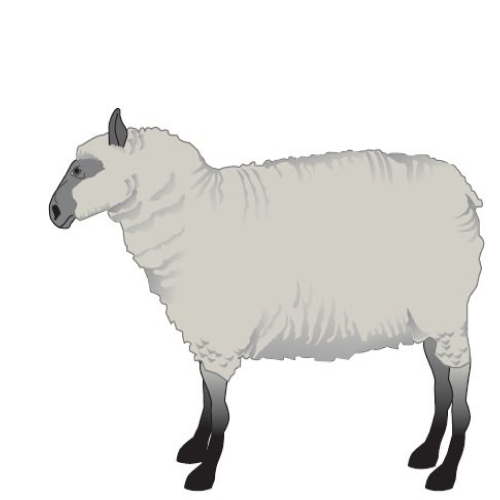

In [94]:
translated_img = cv.imread("/content/drive/My Drive/Lab1 Linear algebra/translated_sheep.png")
cv2_imshow(translated_img)

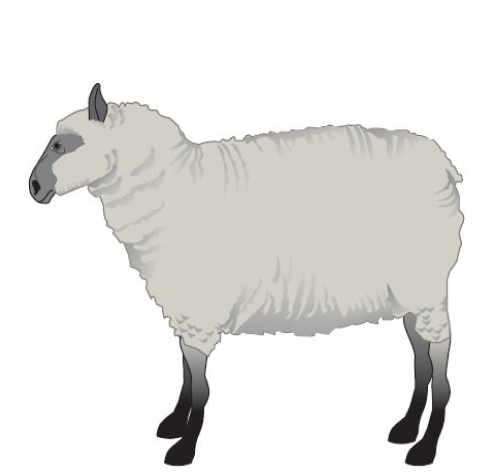

In [95]:
##### YOUR CODE STARTS #####
M = get_translation_matrix(-20, -25)
rows, cols, _ = translated_img.shape
restored_img = cv.warpAffine(translated_img, M[:2], (480, 475))
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

### 1.5 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
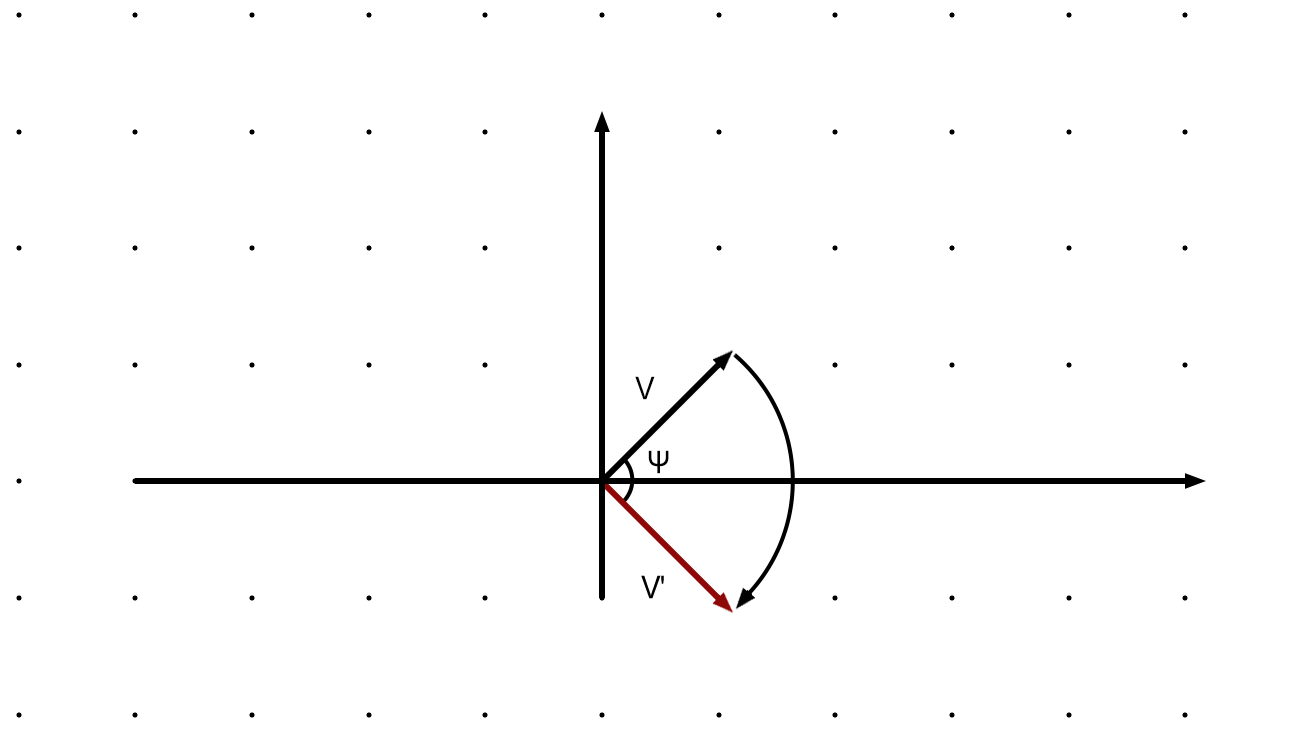

Derive the transformation matrix that corresponds to rotation by a generic angle $\phi$?

To derive the transformation matrix that represents a rotation by a generic angle $\phi$, we use the principles of rotational transformations in a 2D coordinate system.

A rotation matrix $R(\phi)$ rotates a point by an angle $\phi$ counterclockwise around the origin. The general form of the 2D rotation matrix is:

$$
R(\phi) = \begin{bmatrix}
\cos(\phi) & -\sin(\phi) \\
\sin(\phi) & \cos(\phi)
\end{bmatrix}
$$

Explanation:
- The element $\cos(\phi)$ represents the scaling factor for the x-axis, whereas $\sin(\phi)$ represents the scaling factor for the y-axis.
- The negative sign in $-\sin(\phi)$ determines the direction of the rotation, ensuring that the rotation is counterclockwise.
  
This matrix is applied to each point $(x, y)$ in the plane. After rotation, the new coordinates $(x', y')$ of the point are given by:

$$
\begin{bmatrix} x' \\ y' \end{bmatrix} = R(\phi) \begin{bmatrix} x \\ y \end{bmatrix}
$$

Thus, the new coordinates $x'$ and $y'$ are:

$$
x' = x \cdot \cos(\phi) - y \cdot \sin(\phi)
$$
$$
y' = x \cdot \sin(\phi) + y \cdot \cos(\phi)
$$

Your next task is to implement a function that calculates the rotation matrix and apply it to a vector to rotate it by $45^\circ$.
First, construct the rotation matrix:

In [96]:
# Create rotation matrix

def get_rotation_matrix(phi):
  ##### YOUR CODE STARTS #####
  phi_rad = math.radians(phi)

  transformation_matrix = np.array([
        [math.cos(phi_rad), -math.sin(phi_rad)],
        [math.sin(phi_rad), math.cos(phi_rad)]
    ])

  ##### YOUR CODE ENDS #####
  return transformation_matrix

phi = 45
M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Rotation matrix is
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


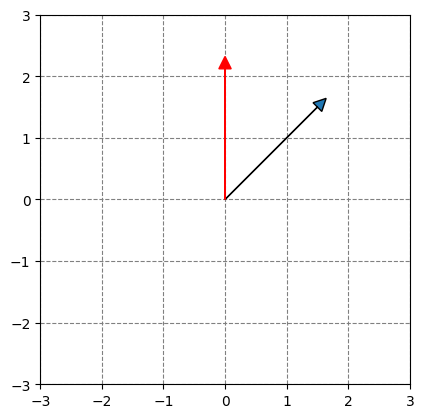

In [97]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

B1_rotated = np.dot(M, B1)

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B1_rotated[0], B1_rotated[1], head_width=0.2, head_length=0.2, fc='red', ec='red', label="Rotated Vector")

plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! There is image rotated by 45 degrees. Rotate it back with transformation matrix, so it will look like **sheep.png**:

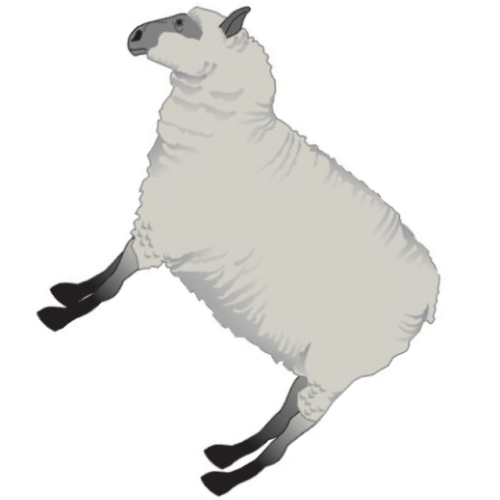

In [98]:
rotated_img = cv.imread("/content/drive/My Drive/Lab1 Linear algebra/rotated_sheep.png")
cv2_imshow(rotated_img)

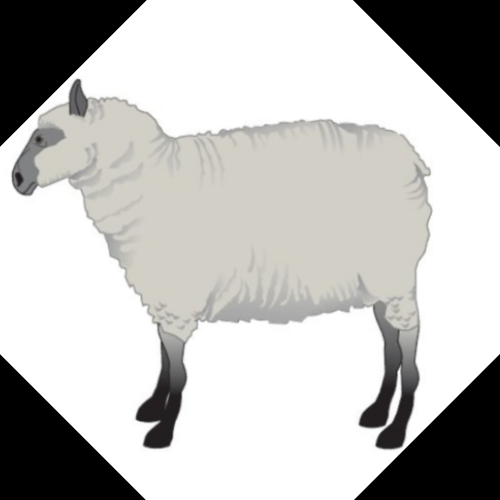

In [99]:
##### YOUR CODE STARTS #####
rows, cols, _ = rotated_img.shape
M=cv.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_img = cv.warpAffine(rotated_img, M, (500, 500),  flags = cv.INTER_LINEAR, borderMode = cv.BORDER_CONSTANT)
#### YOUR CODE ENDS #####

cv2_imshow(rotated_img)

### 1.6 Mirror symmetry
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

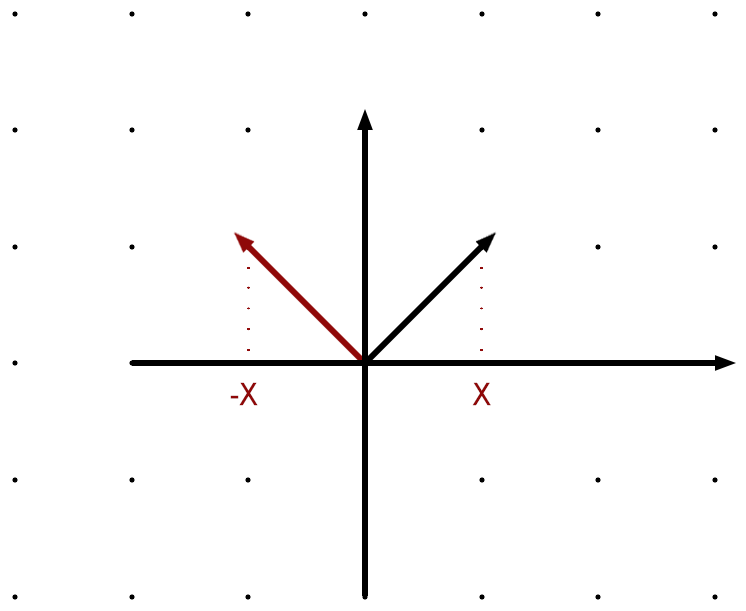

As in the previous parts, you need to provide the expanltion, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.

To perform a reflection of a vector over the vertical axis (i.e., flipping it horizontally), we need to construct a transformation matrix; here the $x$ coordinate of the vector is negated, while the $y$ coordinate stays the same. Thus, the transformation matrix for a vertical mirror (symmetry) is:

$$
M_{5} =
\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}
$$

This matrix will reflect any 2D vector over the vertical axis. Below is the code that makes for an example of how this matrix can be used.

In [100]:
##### YOUR CODE STARTS #####
def get_vertical_mirror_marix():
  return np.array([[-1, 0], [0, 1]])

M5 = get_vertical_mirror_marix()
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

Mirroring matrix is
[[-1  0]
 [ 0  1]]


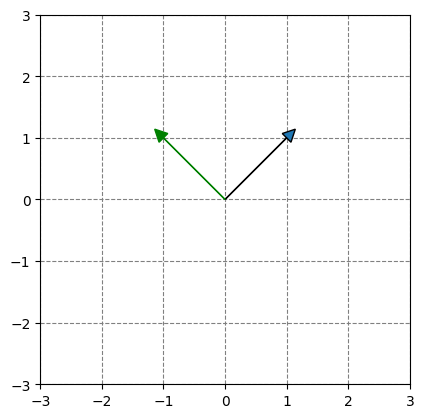

In [101]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.array([-1, 1])
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Apply a vertical symmetry matrix to restore **sheep.png**.

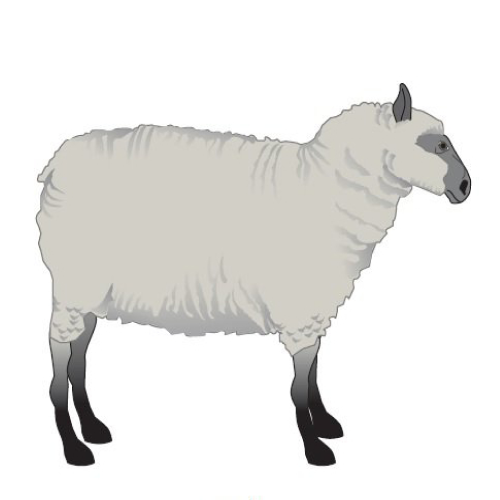

In [102]:
mirrored_img = cv.imread("/content/drive/My Drive/Lab1 Linear algebra/mirrored_sheep.png")
cv2_imshow(mirrored_img)

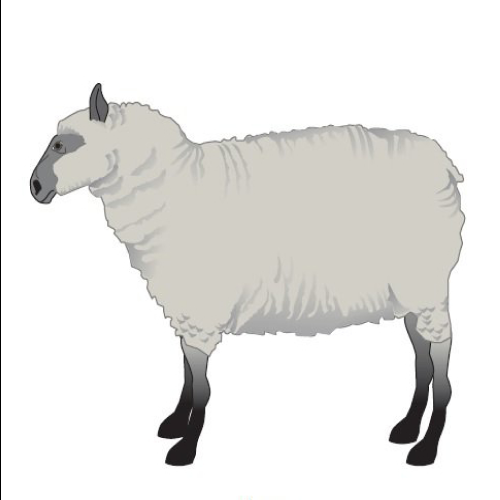

In [103]:
##### YOUR CODE STARTS #####
height, width, _ = mirrored_img.shape
M = np.float32([
    [-1, 0, width],
    [ 0, 1,    0]
])
restored_img = cv.warpAffine(mirrored_img, M, (width, height), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)
##### YOUR CODE ENDS #####
cv2_imshow(restored_img)

## 2.

### 2.1 Perspective shift (homography) matrix

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


You will need to use `img2.jpg` for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

❗️We recommend reading more here: https://docs.opencv.org/4.x/d9/dab/tutorial_homography.html.


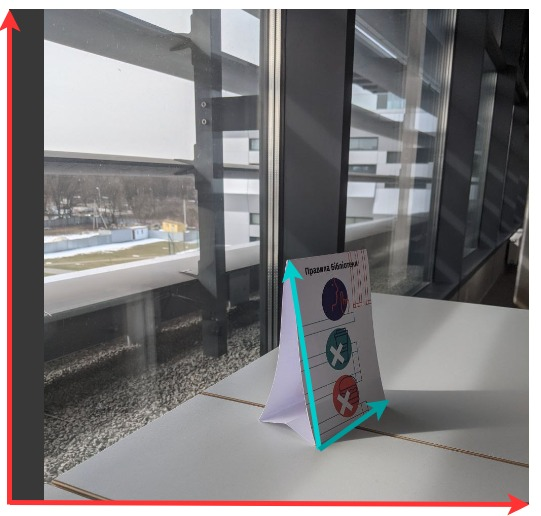

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image ($3$ of these points should not be collinear). Simply saying, you can choose these points using, for example, Paint.

Our goal is to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

In this case, the transformation matrix is a $3 \times 3$ matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$$
\begin{bmatrix}
u_i \\
v_i \\
1
\end{bmatrix} =
\begin{bmatrix}
c_{00} & c_{01} & c_{02} \\
c_{10} & c_{11} & c_{12} \\
c_{20} & c_{21} & c_{22}
\end{bmatrix}
\begin{bmatrix}
x_i \\
y_i \\
1
\end{bmatrix}
$$



Slightly rewriting the equation we can move to:

$$ u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}} $$

$$ v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}} $$

where $\textcolor{red}{(u_i, v_i)}$ is the coordinates of the destination points and $\textcolor{blue}{(x_i, y_i)}$ is coodinates of the sourse points. In our case sourse points are that on the paper(blue vector) and destination is just corners of the photo (red vectors).


Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible.

(Hint: $c_{22}$ can be taken as any number; for example, $c_{22} = 1$; the reason is that the matrix we are looking for has $8$ degrees of freedom as it is estimated up to a constant)

First, start from explaining how to move from the equations for $u_i$ and $v_i$ to a system of linear equations of the form $A\mathbf{x} = \mathbf{b}$.

$$ u_i (c_{20}*x_i + c_{21}*y_i + c_{22}) = c_{00}*x_i + c_{01}*y_i + c_{02} $$
$$ v_i (c_{20}*x_i + c_{21}*y_i + c_{22}) = c_{10}*x_i + c_{11}*y_i + c_{12} $$

transform to

$$ c_{00}*x_i + c_{01}*y_i + c_{02}*1 +0*c_{10}+0*c_{11}+0*c_{12} - u_i*c_{20}*x_i - u_i*c_{21}*y_i - u_i*c_{22} = 0$$
$$ c_{00}*0 + c_{01}*0 + c_{02}*0 +c_{10}*x_i+c_{11}*y_i+c_{12}*1 - v_i*c_{20}*x_i - v_i*c_{21}*y_i - u_i*c_{22} = 0$$

lets $c_{22}=1$

**Now rewrite it as a system in form of Ax=b:**

$$
\begin{bmatrix}
x_i & y_i & 1 & 0 & 0 & 0 & -x_{\text{i}} \cdot u_i & -y_{\text{i}} \cdot u_i & -u_i\\
0 & 0 & 0 & x_i & y_i & 1 & -x_{\text{i}} \cdot v_i & -y_{\text{i}} \cdot v_i &-v_i
\end{bmatrix}
\begin{bmatrix}
c_{00} \\[1pt]
c_{01} \\[1pt]
c_{02} \\[1pt]
.\\
.\\
.\\
c_{31} \\[1pt]
c_{32} \\[1pt]
c_{33}
\end{bmatrix}
=
\begin{bmatrix}
0 \\[1pt]
0
\end{bmatrix}
$$




Next, prepare the second image:

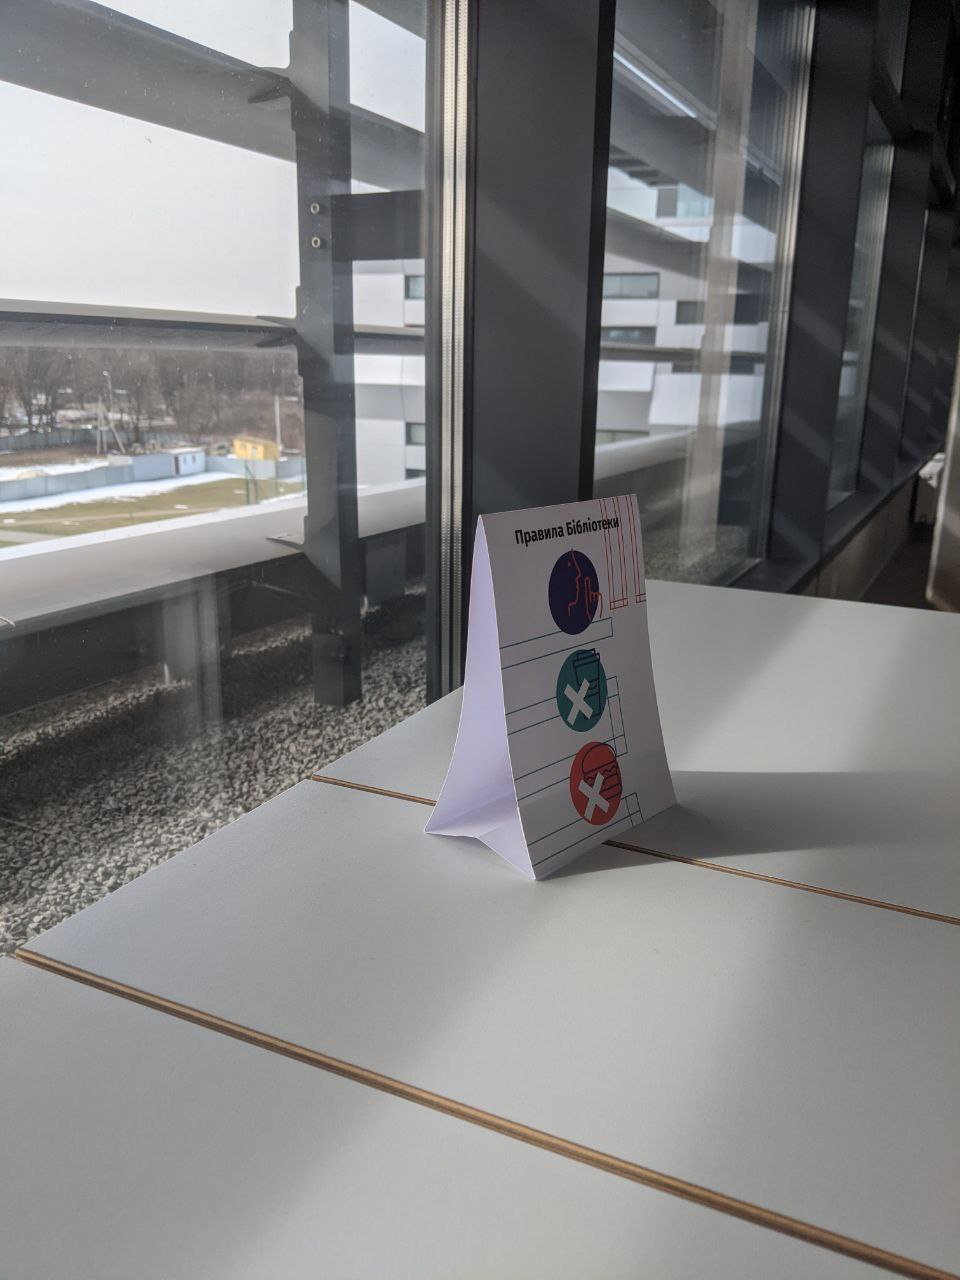

In [105]:
##### YOUR CODE STARTS #####
img2_path = "/content/drive/My Drive/Lab1 Linear algebra/img2.jpg"
##### YOUR CODE ENDS #####
image2 = cv.imread(img2_path)

cv2_imshow(image2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

1280 960


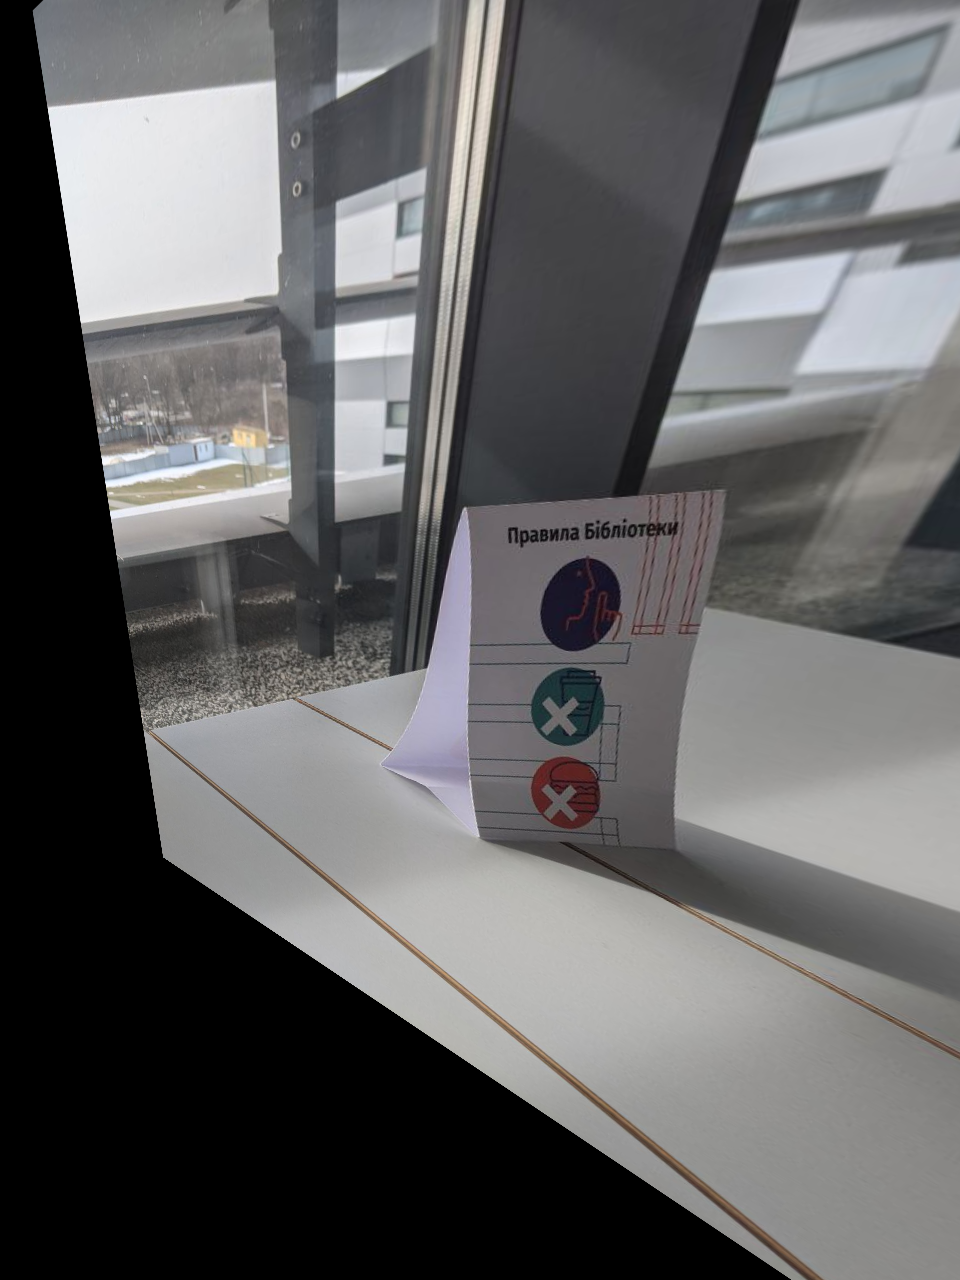

In [106]:
##### YOUR CODE STARTS #####
def get_perspective_transform_matrix(source, destination):
  A = []
  b = []

  for (x, y), (u, v) in zip(source, destination):
      A.append([x, y, 1, 0, 0, 0, -x*u, -y*u])
      A.append([0, 0, 0, x, y, 1, -x*v, -y*v])
      b.append(u)
      b.append(v)

  A = np.array(A, dtype=np.float32)
  b = np.array(b, dtype=np.float32)

  h = np.linalg.solve(A, b)
  h = np.append(h, 1)
  H = h.reshape(3, 3)
  return H

rows,cols,ch = image2.shape
print(rows,cols)

source_points = np.float32([[485, 775], [640, 785], [685, 480], [540, 410]])
destination_points = np.float32([[440,745], [625,815], [850,470], [575,370]])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)
transformed = cv.warpPerspective(image2, perspective_shift_m, (cols, rows))

cv2_imshow(transformed)
##### YOUR CODE ENDS #####

Compare your result with one obtained with the built-in `getPerspectiveTransform()` opencv funtion.

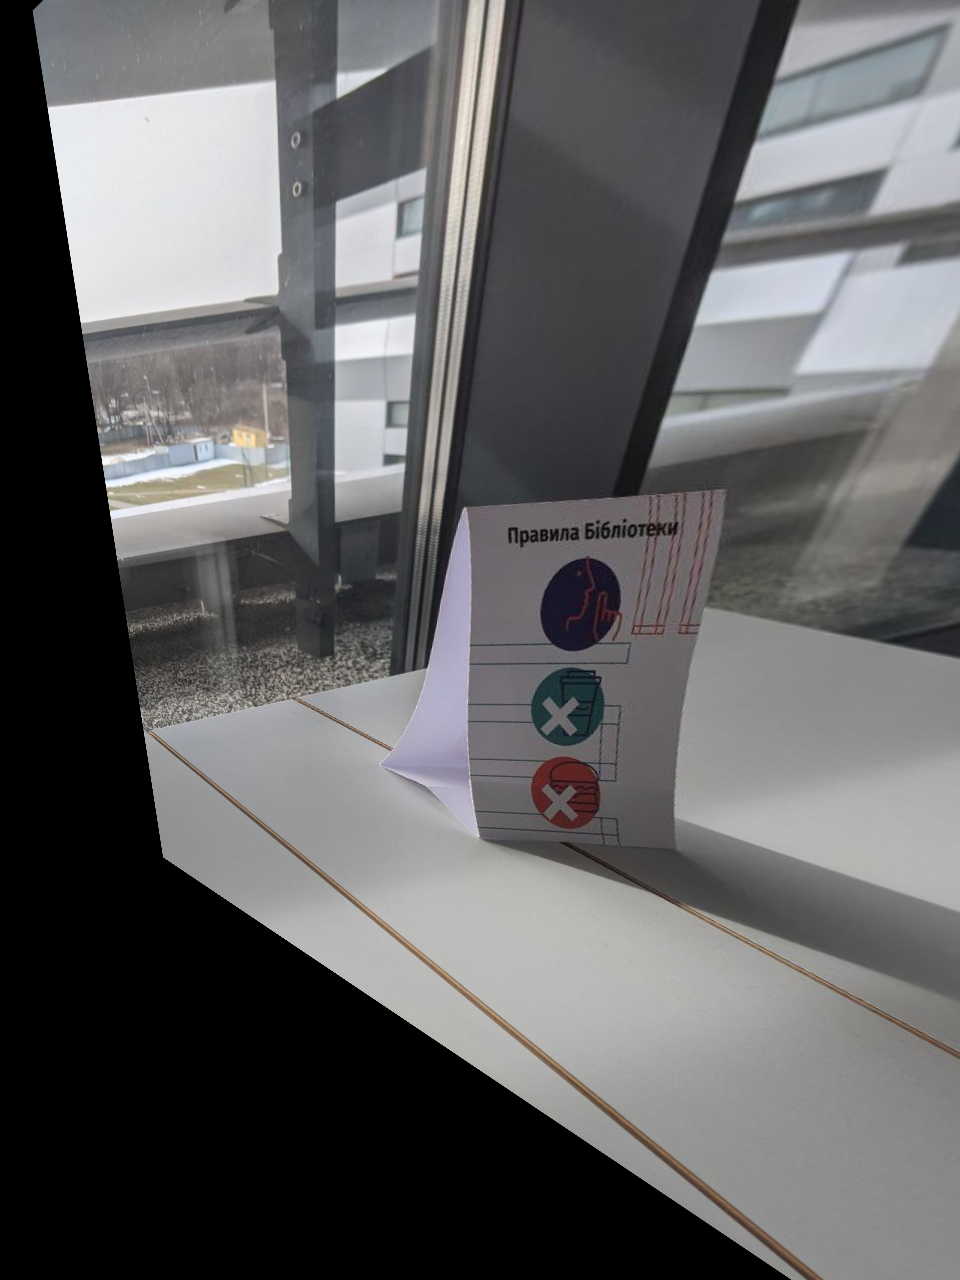

In [107]:
##### YOUR CODE STARTS #####
Mimg2 = cv.getPerspectiveTransform(source_points, destination_points)
transformed_img = cv.warpPerspective(image2, Mimg2, (image2.shape[1], image2.shape[0]))
cv2_imshow(transformed_img)
##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------
---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


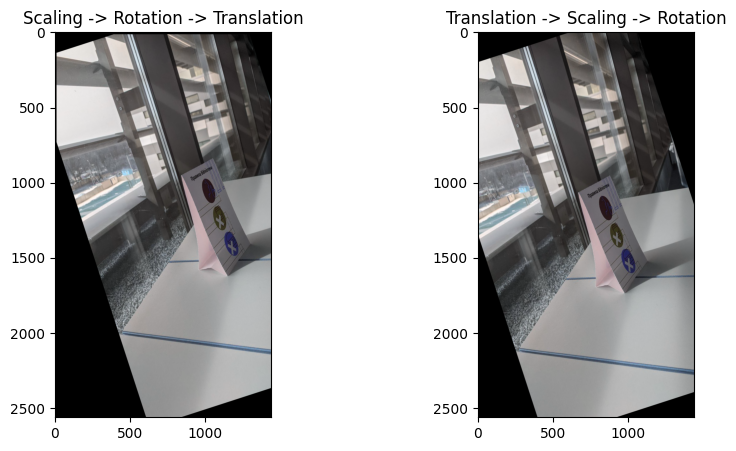

In [108]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

card_image = cv.imread(img2_path)
##### YOUR CODE STARTS #####
height, width = card_image.shape[:2]
center = (width // 2, height // 2)
R = cv.getRotationMatrix2D(center, 18,1)
T = get_translation_matrix(10, 15)
T = decrease_coordinates(T)
scaled = cv.resize(card_image, (int(width * 1.5), int (height * 2) ))
rotated = cv.warpAffine(scaled, R, (scaled.shape[1], scaled. shape[0]))
translated = cv.warpAffine(rotated, T, (rotated.shape[1], rotated.shape[0]))

##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####
translated2 = cv.warpAffine(card_image, T, (width, height))
scaled2 = cv.resize(translated2, (int(width * 1.5), int(height * 2)))
center2 = (scaled2.shape[1] // 2, scaled2.shape[0] // 2)
R2 = cv.getRotationMatrix2D(center2, 18, 1)
rotated2 = cv.warpAffine(scaled2, R2, (scaled2.shape[1], scaled2.shape[0]))

##### YOUR CODE ENDS #####

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# 1 row, 2 columns, first image
plt.imshow (translated)
plt.title('Scaling -> Rotation -> Translation')
plt.subplot(1, 2, 2)
plt.imshow(rotated2)
# 1 row, 2 columns, second image
plt.title('Translation -> Scaling -> Rotation')
plt.show()

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met? Derive it theoretically.

No, the outputs do not generally coincide when changing the order of transformations, and we can see from the code's output they do not coincide here. This is because scaling, rotation, and translation are not commutative operations.

### Can the Same or Different Results Be Obtained by Changing the Order of Transformations?
Yes. Different results are obtained when changing the order of transformations unless specific conditions hold.

For example:
- If we **scale first**, then **rotate**, and then **translate**, the translation is applied after the object has been scaled and rotated, meaning the translation vector is also affected by those operations.
- If we **translate first**, then **scale**, and then **rotate**, the translation happens in the original coordinate system before any distortions, which changes how the subsequent transformations act.

Thus, the result depends on the reference frame in which each transformation is performed.

### Under What Conditions Would the Results Be Identical?

Transformations in image processing are represented using transformation matrices:

- **Scaling Matrix** $S(s_x, s_y)$:

  $$
  S =
  \begin{bmatrix}
  s_x & 0 & 0 \\
  0 & s_y & 0 \\
  0 & 0 & 1
  \end{bmatrix}
  $$

- **Rotation Matrix** $R(\theta)$:

  $$
  R =
  \begin{bmatrix}
  \cos\theta & -\sin\theta & 0 \\
  \sin\theta & \cos\theta & 0 \\
  0 & 0 & 1
  \end{bmatrix}
  $$

- **Translation Matrix** $T(t_x, t_y)$:

  $$
  T =
  \begin{bmatrix}
  1 & 0 & t_x \\
  0 & 1 & t_y \\
  0 & 0 & 1
  \end{bmatrix}
  $$

The final transformation applied to a point $(x, y)$ is the product of these matrices:

$$
P' = T R S P
$$

#### **Case 1: Scaling Before Translation**
$$
T S P =
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
s_x & 0 & t_x \\
0 & s_y & t_y \\
0 & 0 & 1
\end{bmatrix}
$$

#### **Case 2: Translation Before Scaling**
$$
S T P =
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
s_x & 0 & s_x t_x \\
0 & s_y & s_y t_y \\
0 & 0 & 1
\end{bmatrix}
$$

Clearly, $S T \neq T S$ unless $s_x = s_y = 1$, proving that scaling affects translation.

#### **Case 3: Rotation Before Translation**
$$
T R P =
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta & t_x \\
\sin\theta & \cos\theta & t_y \\
0 & 0 & 1
\end{bmatrix}
$$

#### **Case 4: Translation Before Rotation**
$$
R T P =
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
\cos\theta & -\sin\theta & \cos\theta t_x - \sin\theta t_y \\
\sin\theta & \cos\theta & \sin\theta t_x + \cos\theta t_y \\
0 & 0 & 1
\end{bmatrix}
$$

Clearly, $R T \neq T R$ unless $t_x = t_y = 0$ or $ \theta = 0^\circ, 180^\circ, 360^\circ ...$.

#### **Case 5: Rotation Before Scaling**
$$
S R P =
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
s_x \cos\theta & -s_x \sin\theta & 0 \\
s_y \sin\theta & s_y \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

#### **Case 6: Scaling Before Rotation**
$$
R S P =
\begin{bmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
s_x \cos\theta & -s_y \sin\theta & 0 \\
s_x \sin\theta & s_y \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Clearly, $S R \neq R S$ unless $s_x = s_y$, meaning that rotation and scaling commute only when the scaling is uniform.

---

### Conclusion
- **Order of transformations matters** because translation, rotation, and scaling do not generally commute (as do most matrices on multiplication)
- **The transformations coincide only under special conditions**:
  - Translation and rotation commute only if the translation vector is aligned with the rotation.
  - Scaling and rotation commute only if scaling is uniform.

## 3. Image impainting (1 bonus point!)

In [109]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy

It is a widely used technique in Computer Vision that involves filling in missing or corrupted parts of an image in a visually plausible way.
Today, we will explore a simple approach to solving this problem using **grayscale images** for easier mathematical representation.  

In NumPy, a **grayscale image** is represented as a **2D matrix**, where each element corresponds to the intensity of a pixel $I_{gray} \in \mathbb{R}^{H \times W}$,where $H$ and $W$ are the image height and width, respectively.

```python
gray_image = np.array([
    [0, 128, 255],
    [64, 192, 255],
    [32, 160, 240]
])
```

In contrast, a **color image (RGB)** is a **3D matrix**, where each pixel has three intensity values corresponding to the Red, Green, and Blue channels $
I_{color} \in \mathbb{R}^{H \times W \times 3}$

```python
color_image = np.array([
    [[0, 0, 0], [128, 128, 128], [255, 255, 255]],
    [[64, 64, 64], [192, 192, 192], [255, 255, 255]],
    [[32, 32, 32], [160, 160, 160], [240, 240, 240]]
])
```

By working with grayscale images, we reduce the problem to single-channel interpolation, making it easier to comprehend at the beginning)))  

One of the simplest image inpainting methods for small missing areas is **neighbor averaging**, where a missing pixel is restored by computing the average value of its known neighboring pixels.

For a missing pixel $I(x, y)$, its value can be estimated as:

$$
I(x, y) = \frac{1}{|𝒩(x, y)|} \sum_{(i,j) \in 𝒩(x, y)} I(i, j)
$$

where:  
- $𝒩(x, y)$ is the set of known neighboring pixels around $(x, y)$  
- $|𝒩(x, y)|$ is the number of valid neighbors  
- $I(i, j)$ is the intensity value of a neighboring pixel

---

The set of known neighboring pixels $𝒩(x, y)$ depends on:
* whether we consider 4-connectivity (direct neighbors only):
$$
𝒩_{4}(x, y) = \{ I(x-1, y), I(x+1, y), I(x, y-1), I(x, y+1) \}
$$

* or 8-connectivity (including diagonal neighbors):
$$
𝒩_{8}(x, y) = \{ I(x-1, y-1), I(x-1, y), I(x-1, y+1), I(x, y-1), I(x, y+1), I(x+1, y-1), I(x+1, y), I(x+1, y+1) \}
$$

---

In a **3×3 grid**, the missing pixel at $(1,1)$ is restored using its **top, bottom, left, and right** neighbors:
$$
I(1,1) = \frac{I(0,1) + I(1,0) + I(1,2) + I(2,1)}{4}
$$

With **all 8 neighbors (including those on the angles)**, the missing pixel is estimated as:

$$
I(1,1) = \frac{I(0,0) + I(0,1) + I(0,2) + I(1,0) + I(1,2) + I(2,0) + I(2,1) + I(2,2)}{8}
$$


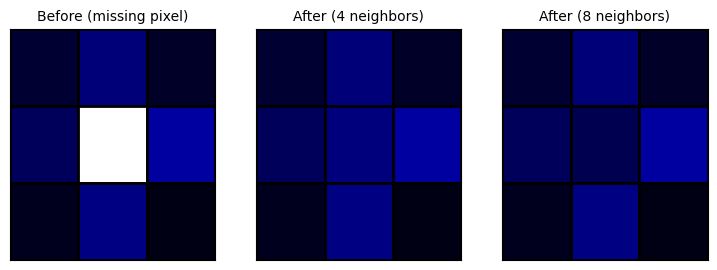

In [110]:
# 3x3 image with a missing center pixel
original_image = np.array([
    [50, 120, 40],
    [90, None, 160],
    [30, 130, 20]
], dtype=object)

# Restore using only direct (4) neighbors
direct_neighbors = [original_image[i, j] for i, j in [(0,1), (1,0), (1,2), (2,1)] if original_image[i, j] is not None]
restored_image_4 = original_image.copy()
restored_image_4[1, 1] = int(np.mean(direct_neighbors))

# Restore using all (8) neighbors
all_neighbors = [original_image[i, j] for i in range(3) for j in range(3) if original_image[i, j] is not None]
restored_image_8 = original_image.copy()
restored_image_8[1, 1] = int(np.mean(all_neighbors))

def plot_image(image, title, ax):
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=10)

    for i in range(3):
        for j in range(3):
            value = image[i, j]
            color = (0, 0, value / 255) if value is not None else (1, 1, 1)  # white for missing pixel
            rect = patches.Rectangle((j, 2 - i), 1, 1, facecolor=color, edgecolor='black', linewidth=2)
            ax.add_patch(rect)

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_image(original_image, "Before (missing pixel)", axs[0])
plot_image(restored_image_4, "After (4 neighbors)", axs[1])
plot_image(restored_image_8, "After (8 neighbors)", axs[2])
plt.show()


**But what if multiple pixels are missing?**  

When multiple adjacent pixels are missing, we can no longer use simple **neighbor averaging** because some missing pixels depend on others that are also unknown. Instead, we need to set up a **system of linear equations**, where each missing pixel is expressed in terms of its known neighbors and other missing pixels.  


### **Task 1**

Let's consider a simple case where we have a **2×2 missing block** inside a larger image. Your task is to write the system of equations in the form and solve for the missing pixel values.

---

We have a 5×5 grayscale image with the center 2×2 pixels are missing:

$$
\begin{bmatrix}
100 & 115 & 130 & 140 & 150 \\
110 & \mathbf{?} & \mathbf{?} & 145 & 155 \\
115 & \mathbf{?} & \mathbf{?} & 150 & 160 \\
120 & 135 & 140 & 155 & 165 \\
125 & 140 & 145 & 160 & 170
\end{bmatrix}
$$

We can assign variables to the missing pixels $
X_1 = I(1,1), \quad X_2 = I(1,2), \quad X_3 = I(2,1), \quad X_4 = I(2,2)$. Each missing pixel is estimated as the average of its neighbors.

---
1. Write the system of equations for the four unknowns $X_1, X_2, X_3, X_4$ using the given pixel values.
2. Construct the matrix equation $A X = B$, where $A$ is the coefficient matrix, $X$ is the vector of unknowns, $B$ is the vector of known values.
3. Solve for $X$ using `NumPy linalg solver`.

To help, here are the (4) neighbors of each missing pixel:

- $X_1$ (Row 1, Col 1): uses 110, 115, X_2, X_3
- $X_2$ (Row 1, Col 2): uses 130, 145, X_1, X_4
- $X_3$ (Row 2, Col 1): uses 115, 135, X_1, X_4
- $X_4$ (Row 2, Col 2): uses 150, 140, X_2, X_3


**Your theoretical formulation of the system of equations:**

---

$$
X_1 = \frac{1}{4} (110 + 115 + X_2 + X_3) \\
X_2 = \frac{1}{4} (130 + 145 + X_1 + X_4) \\
X_3 = \frac{1}{4} (115 + 135 + X_1 + X_4) \\
X_4 = \frac{1}{4} (150 + 140 + X_2 + X_3)\\
$$

Transformations for matrix creation:
$$
X_1 - 0.25 X_2 - 0.25 X_3 = \frac{110 + 115}{4} \\
-0.25 X_1 + X_2 - 0.25 X_4 = \frac{130 + 145}{4}\\
-0.25 X_1 + X_3 - 0.25 X_4 = \frac{115 + 135}{4}\\
-0.25 X_2 - 0.25 X_3 + X_4 = \frac{150 + 140}{4}
$$

---

### Matrix Ax=B
$$
\begin{bmatrix}
1 & -0.25 & -0.25 & 0 \\
-0.25  & 1 & 0 & -0.25 \\
-0.25 & 0 & 1 & -0.25 \\
0 & -0.25 & -0.25 & 1 \\
\end{bmatrix}
\begin{bmatrix}
X_1 \\[6pt]
X_2 \\[6pt]
X_3 \\[6pt]
X_4
\end{bmatrix}
=
\begin{bmatrix}
56.25 \\[6pt]
68.75 \\[6pt]
62.5 \\[6pt]
72.5
\end{bmatrix}
$$

In [111]:
### YOUR CODE SOLUTION START

# Define the coefficient matrix A based on the equations derived from neighbor averaging
A = np.array([
    [1, -0.25, -0.25, 0],
    [-0.25, 1, 0, -0.25],
    [-0.25, 0, 1, -0.25],
    [0, -0.25, -0.25, 1]
])

# Define the right-hand side B based on known neighbor values
B = np.array([56.25, 68.75 ,  62.5,  72.5])

### YOUR CODE SOLUTION END

X = np.linalg.solve(A, B)
assert np.allclose(X, np.array([121.45833333, 133.54166667, 127.29166667, 137.70833333]), atol=1e-6), "Assertion failed: Computed values do not match expected values"

### **Task 2**

Implement an actual image inpainting algorithm that reconstructs missing pixel values using a linear system approach. Compare results with manual implementation of Gaussian elimination and NumPy solver.

Functions you need to implement:
- `construct_linear_system(pixel_matrix, damaged_coords)`  
- `solve_linear_system(A, b, method='numpy')`

Helper functions (already provided):
- `to_grayscale(img)`
- `get_pixel_matrix(img)`
- `set_pixel_matrix(img, pixel_matrix)`
- `create_damaged_matrix(pixel_matrix, num_blocks=5, block_size=20)`
- `complete_solution(img_gray, damaged_matrix, damaged_coords, method='numpy')`

Parameters `num_blocks` and `block_size` can be changed and customized to your preference (but we do not recommend choosing large values due to the probability of long computations).

An example of a potential result:

![image.png](attachment:image.png)

In [112]:
# Convert an image to grayscale
def to_grayscale(img):
    return img.convert("L")

# Get the pixel intensity matrix
def get_pixel_matrix(img):
    width, height = img.size
    return [[img.getpixel((x, y)) for x in range(width)] for y in range(height)]

# Set pixel values from a matrix back to an image
def set_pixel_matrix(img, pixel_matrix):
    width, height = img.size
    for y in range(height):
        for x in range(width):
            img.putpixel((x, y), int(pixel_matrix[y][x]))
    return img

# Generate damaged regions in an image
def create_damaged_matrix(pixel_matrix, num_blocks=5, block_size=20):
    height, width = len(pixel_matrix), len(pixel_matrix[0])
    damaged_coords = []
    damaged_matrix = [row[:] for row in pixel_matrix]

    for _ in range(num_blocks):
        rand_x = random.randint(0, width - block_size)
        rand_y = random.randint(0, height - block_size)
        for y in range(rand_y, rand_y + block_size):
            for x in range(rand_x, rand_x + block_size):
                damaged_coords.append((y, x))
                damaged_matrix[y][x] = 0

    return damaged_matrix, damaged_coords

**Task 2.1**

In [113]:
# Construct the linear system Ax = B for missing pixels
def construct_linear_system(pixel_matrix, damaged_coords):
    """
    Explanations:
    - This function constructs a linear system where each missing pixel is represented by an equation.
    - Each missing pixel is expressed as the average of its valid neighboring pixels.
    - The mapping 'var_index' assigns a unique index to each missing pixel, allowing it to be referenced in matrix form.

    Example:
    var_index = {
        (2, 3): 0, # first missing pixel -> X_0
        (3, 4): 1, # second missing pixel -> X_1
        (5, 2): 2  # third missing pixel -> X_2
    }

    Returns:
    - A (list of lists): Coefficient matrix representing the system of equations.
    - b (list): Right-hand side vector containing known pixel values.
    """
    height, width = len(pixel_matrix), len(pixel_matrix[0])
    var_index = {coord: i for i, coord in enumerate(damaged_coords)}
    n = len(damaged_coords)
    A = [[0] * n for _ in range(n)]
    b = [0] * n

    ### YOUR CODE SOLUTION START
    def neighbours(coords, mx_size, num):
        i, j = coords
        if num == 4:
            rng = [-1, 1]
        else:
            rng = [-1, 0, 1]
        res = [(i+a, j+b) for a in rng for b in rng]
        res = list(filter(lambda x:0 <= x[0] < mx_size and
        0 <= x[1] < mx_size and not(x[0] == i and x[1] == j), res))
        return res

    neigbours_to_use = 8 #4

    for i in range(height):
        for j in range(width):
            if (i, j) in damaged_coords:
                A[var_index[(i, j)]][var_index[(i, j)]] = 1
                neighs = neighbours((i, j), n, neigbours_to_use)
                b_i = 0
                for neigh in neighs:
                    if neigh in damaged_coords:
                        A[var_index[(i, j)]][var_index[neigh]] = -1/neigbours_to_use
                    else:
                        b_i += pixel_matrix[neigh[0]][neigh[1]]
                b[var_index[(i, j)]] = b_i/neigbours_to_use
    ### YOUR CODE SOLUTION END

    return A, b

**Task 2.2**

In [114]:
# Solve the linear system using Gaussian elimination or NumPy
def solve_linear_system(A, b, method='numpy'):
    """
    Solves the linear system Ax = B.

    Parameters:
    - A (list of lists): Coefficient matrix.
    - b (list): Right-hand side vector.
    - method (str): 'numpy' to use NumPy solver, 'gaussian' to use manual Gaussian elimination.

    Returns:
    - x (list): Solution vector containing the restored pixel values.
    """
    if method == 'numpy':
        return np.linalg.solve(A, b)
    else:
        n = len(A)
        x = [0] * n

        ### YOUR CODE SOLUTION START
        def determinant(A):
            m = len(A)
            if m > 0:
                n = len(A[0])
            else:
                return 0
            if n != m:
                return 0

            det = 0
            for shift in range (n):
                line = 1
                for i in range(n):
                    line *= A[i][(i+shift) % n]
                det += line


            for shift in range (n):
                line = 1
                for i in range(n):
                    line *= A[i][(n-i+shift) % n]
                det -= line
            return det

        det_A = determinant(A)
        if not det_A:
            raise ValueError("singular")

        for i in range(n):
            B_i = copy.deepcopy(A)
            for j in range(n):
                B_i[j][i] = b[j]
            det_B = determinant(B_i)
            x[i] = det_B/det_A

        ### YOUR CODE SOLUTION END

        return x

In [115]:
def complete_solution(img_gray, damaged_matrix, damaged_coords, method='numpy'):
  try:
      solution = solve_linear_system(A, b, method)
  except ValueError as e:
      print("Error solving the system:", e)
      solution = None

  # Apply the reconstructed pixel values
  if solution is not None:
      restored_matrix = [row[:] for row in damaged_matrix]
      for i, (y, x) in enumerate(damaged_coords):
          restored_matrix[y][x] = int(solution[i])

      # Create visualization
      restored_img = set_pixel_matrix(img_gray.copy(), restored_matrix)
      damaged_img = set_pixel_matrix(img_gray.copy(), damaged_matrix)
      highlighted_matrix = [row[:] for row in damaged_matrix]
      for (y, x) in damaged_coords:
          highlighted_matrix[y][x] = 255
      highlighted_img = set_pixel_matrix(img_gray.copy(), highlighted_matrix)

      # Display results
      fig, axs = plt.subplots(1, 3, figsize=(15, 5))
      axs[0].imshow(img_gray, cmap='gray')
      axs[0].set_title("Original Image")
      axs[1].imshow(highlighted_img, cmap='gray')
      axs[1].set_title("Damaged Image")
      axs[2].imshow(restored_img, cmap='gray')
      axs[2].set_title("Reconstructed Image")

      for ax in axs:
          ax.axis("off")

      plt.show()

**Example of use**

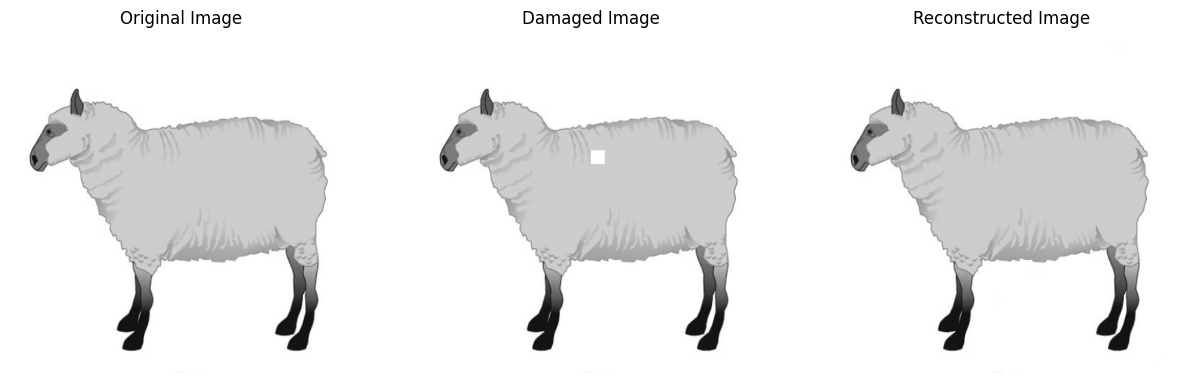

In [ ]:
# Load and preprocess the image
img = Image.open("/content/drive/My Drive/Lab1 Linear algebra/sheep.png")
img_gray = to_grayscale(img)
pixel_matrix = get_pixel_matrix(img_gray)

# Create damaged image
num_blocks=5 # number of damages
block_size=20 # pixel size of damages
height, width = len(pixel_matrix), len(pixel_matrix[0])
damaged_matrix, damaged_coords = create_damaged_matrix(pixel_matrix, num_blocks, block_size)

# Construct the linear system
A, b = construct_linear_system(pixel_matrix, damaged_coords)

# Solve and visualize
complete_solution(img_gray, damaged_matrix, damaged_coords)
complete_solution(img_gray, damaged_matrix, damaged_coords, method='manual')

**Your thoughts and conclusions:**

---

**Task 1** asked us to express the missing pixels through their neighbouring ones and transform these equations in the form suitable for matrix. From that we could see the pattern that in the i^th row there is a 1 corresponding to the i^th missing entry and either -¼ or -⅛ (depending on the number of neighbours taken into account) corresponding to the neighbouring missing values. The values of other neighbours are summed up and divided, again, by 4 or 8. This information will come in handy in the further tasks.

In **Task 2.1** we had to construct the matrix in question from the pixel matrix. Here I iterated through all of the entries and if it was missing, filled a new row of the matrix with 1 for the entry itself and -1/neighbours_to_use - the variable that is responsible for the number of neighbours to be taken into account - for the neighbouring missing entries. Others I summed up in b_i and once again divided it by neighbours_to_use.

**It makes more sense to put neigbours_to_use as one of the function arguments, but I decided not to disturb your structure.*

**Task 2.2** asked us to solve Ax = b. The standard algorithm (Gauss-Jordan elimination) was too made-for-humans for my liking, so I opted for the Cramars method - replacing columns with b one by one and calculating new determinants and dividing them by det(A). The determinant itself is calculated with the arrow method, because, again, it is simple to implement and is suitable for the task.



*Overall the concept the additional assignment was about was quite interesting to get to know about. It is simple enough to understand and implement and is extremely effective on matrices with small areas missing. It is much less effective on large areas, but it can still restore the picture to some extent. It is also reliable, since if missing pixel 1 depends on a missing pixel 2, then the other way around is true too, and 2 pixels cannot depend on the same neighbours (because they have different positions), the A in Ax = b is always non-singular, so there is always a unique solution. There must be some other ways to use when the missing area broadens, so I’d definitely like to read more about the topic.*


---

**Additional questions:**
1. What other methods do you know to solve a system of linear equations?
2. What happens if the damaged pixels are located at the edges of the image? How will this affect the equation?
3. How will the problem change if we take diagonal neighbors into account when calculating the average?
4. Why does the algorithm work well for small damage but is ineffective for large areas?
5. How would you improve the approach to repair more complex damage (e.g., entire missing objects)?


---

1. Other methods to solve linear equations Ax = b:
  
  1a. Aforementioned Gauss-Jordan elimination of an augmented matrix. The result should look like this:
$$
    \begin{bmatrix}
    1 & 0 & \cdots & 0 & | & b_1 \\
    0 & 1 & \cdots & 0 & | & b_2 \\
    \vdots & \vdots & \ddots & \vdots & | & \vdots \\
    0 & 0 & \cdots & 1 & | & b_n
    \end{bmatrix}
    \\
    x = [ b_1 b_2 b_3 b_4]^T
$$

  1b. Finding A^-1 (either through applying the same steps, you need to reduce A to its RREF, to the Identity matrix or through finding the adj(A) and dividing it by det(A)) and multiplying A^-1 by b.

\\

2. If the damaged pixels are located at the edges of an image, they have less neighbours and thus there is less information about them. Happens the same thing that happens with the samples with small size. Their sample statistics are not as close to the actual distribution parameters, and with pixels, the information is not as accurate as it could have been if we had all the neighbours. On the other hand, from the human perspective, the colors of the edges are not as important as the center, so the pixels there are allowed to be combinations of their neighbours without much consequence.

\\

3. As I wrote in the previous paragraph, the more neighbours there are to take information from, the more precise the results are. It’s not excluded that the corner neighbours can be part of another depicted object or, for some other reason, be not a good indicator of the color of the missing pixel, but overall the results are more precise, especially on bigger pictures.

\\

4. The larger the missing area becomes, the bigger is the possibility that it held an independent part of the picture, that neighbouring pixels have no information about. Also, the lesser the area is, the less noticeable it is, so even if the prediction of pixel color is incorrect, it does not affect the experience that much.

\\

5. There is no way of accurately restoring larger areas that I could think of that is as simple as the one in the tasks. The more complex one would be a form of a machine learning algorithm, which, with the right amount of pictures, will compare the one at hand to the ones it knows about and figure out if there might be some more objects in the missing area. That, however, would require a lot of computational power and complex programming, so there is also the hybrid approach. The idea is to analyse not only the neighbouring pixels, but also simile areas in other positions in the picture. That way there is a possibility to spot a pattern. For example, if there is a ribbon with flags on the picture, and one flag is completely missing - the algorithm form tasks will fill it with the background color, but if it can spot a pattern, it will add the flag itself. The approach is not as accurate as in the first one, but it is less complex and demanding


---

**You can explore more advanced approaches with the same core idea:**
- [On Surface Completion and Image Inpainting by Biharmonic Functions](https://onlinelibrary.wiley.com/doi/10.1155/2018/3950312)
- [Harmonic Inpainting of the Cosmic Microwave Background Sky: Formulation and Error Estimate](https://arxiv.org/abs/0804.0527)
- [Image Inpainting Method Based on Mixed Median](https://ieeexplore.ieee.org/document/8858556)



## Summary

To summarize everything you have learnt in this lab assignment, answer the questions below.

### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

A transformation matrix defines how an image is warped, scaled, rotated, or translated when applied. The shape of the transformation matrix and its specific values directly determine the type and intensity of the transformation.

#### Shape of a Typical Transformation Matrix

The shape of the matrix depends on the type of transformation being performed:

- **Affine Transformations (Scaling, Rotation, Shear, Translation)**  
  - Shape: $ 3 \times 3 $, or for some transformations $2 \times 2$  
  - Form:

  $$
    A =
    \begin{bmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    0 & 0 & 1
    \end{bmatrix}
  $$

  - This allows for **scaling, rotation, shear, and translation** while preserving parallelism (i.e., straight lines remain straight).
  - Rotation, shear and scaling can also be presented as $2 \times 2$ matrices of form
  $$
    A =
    \begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22}
    \end{bmatrix}
  $$
  but this will not work for translation.


- **Perspective Transformations (Allowing Depth Warping)**  
  - Shape: $ 3 \times 3 $  
  - Form:

  $$
    P =
    \begin{bmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33}
    \end{bmatrix}
  $$

  - This enables **perspective effects**, such as foreshortening, vanishing points, and 3D-like transformations. More on this in the answer below.

#### How the Values of the Matrix Affect the Image

Each value in the transformation matrix plays a specific role:

- **$ a_{11}, a_{22} $ (Scaling in X and Y axes):**  
  - If $ a_{11} > 1 $, the image stretches horizontally.
  - If $ a_{22} > 1 $, the image stretches vertically.
  - If $ a_{11} < 1 $ or $ a_{22} < 1 $, the image shrinks.

- **$ a_{12}, a_{21} $ (Shear/Skewing):**  
  - If nonzero, these values skew the image, tilting it along the X or Y axis.

- **$ a_{13}, a_{23} $ (Translation in X and Y directions):**  
  - Controls how far the image shifts in horizontal and vertical directions.

- **$ a_{31}, a_{32} $ (Perspective Distortion, Only in Perspective Transformations):**  
  - Introduces depth-based warping.
  - If nonzero, parallel lines may appear to converge, creating a 3D perspective effect.

#### Factors That Affect the Shape of the Transformation Matrix

The shape of the matrix is influenced by:

1. **Type of Transformation**  
   - **Affine transformations** (scaling, rotation, shear, translation) require a $ 3 \times 3 $ matrix.
   - **Perspective transformations** require a $ 3 \times 3 $ matrix but with extra degrees of freedom for depth distortion.

2. **Dimensionality of the Input and Output Spaces**  
   - $ 2D \to 2D $ transformations use $ 3 \times 3 $ matrices.
   - $ 3D \to 2D $ projections (e.g., camera models) require $ 3 \times 4 $ matrices.

##### Conclusion

- The shape of the transformation matrix depends on the type of transformation being applied.
- The specific values control the intensity and direction of **scaling, rotation, translation, shear, and perspective distortion**.
- The order of transformations matters, as matrix multiplication is generally **non-commutative**, meaning different orders produce different results.

Thus, selecting the correct transformation matrix is essential for achieving the desired image transformation effect.

### What can be a result of composition of transformations?

### Another Transformation of the Same Type

- The composition of two translations/rotations is another translation/rotation.

### Affine Transformation

- The composition of scaling, rotation, shear, and translation results in an affine transformation, which preserves parallelism but may distort distances and angles.

### Projective (Homographic) Transformation

- If a perspective transformation is involved, the result is still a perspective transformation (homography), possibly with increased distortion.

### Loss of Commutativity

- By changing sequence of transformation of matrix, the result not need be the same.




### What is a perspective shift transformation in terms of geometry?

**Perspective shift transformation** allows to look at the objects from different perspective. #D objects occur in 2D projection. Lines loose their parallelism cause of linear transformation that allows lines that were originally parallel to intersect after the transformation.

*  Straight lines remain straight
* Farther objects shrink, closer objects expand
* Perspective distortion increases with viewing angle